In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
df=pd.read_csv("LABORABLES.csv", sep=';')
print(df.head())
#datos bajados del portal: https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=1a9fd0e209b45410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

    Año           Mes  Interior 1er  cinturón  En el 1er  cinturón  \
0  2024           NaN                     NaN                  NaN   
1  2024         Enero                 103.019              231.233   
2  2024       Febrero                 105.578              239.172   
3  2024         Marzo                 107.578              239.024   
4  2024         Abril                 108.532              249.727   

   Entre 1er y 2º cinturón  En el 2er  cinturón  Entre  2º cinturón y M-30  \
0                      NaN                  NaN                        NaN   
1                  350.079              196.928                    411.976   
2                  357.444              203.746                    427.609   
3                  352.766              194.529                    408.308   
4                  367.178              209.909                    440.596   

      M-30  Entre M-30 y M-40  M-40  Exterior a M-40  
0      NaN                NaN   NaN              NaN  


In [51]:
df.shape

(26, 11)

In [52]:
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        26 non-null     int64  
 1   Mes                        24 non-null     object 
 2   Interior_1er__cinturón     15 non-null     float64
 3   En_el_1er__cinturón        15 non-null     float64
 4   Entre_1er_y_2º_cinturón    15 non-null     float64
 5   En_el_2er__cinturón        15 non-null     float64
 6   Entre__2º_cinturón_y_M-30  15 non-null     float64
 7   M-30                       15 non-null     float64
 8   Entre_M-30_y_M-40          15 non-null     float64
 9   M-40                       0 non-null      float64
 10  Exterior_a_M-40            15 non-null     float64
dtypes: float64(9), int64(1), object(1)
memory usage: 2.4+ KB


Interior 1er cinturón → tráfico dentro del casco histórico.

En el 1er cinturón → tráfico justo en la zona del 1er anillo.

Entre 1er y 2º cinturón → zona intermedia.

En el 2º cinturón.
Entre 2º cinturón y M-30.

M-30 → tráfico en la vía de circunvalación M-30.

Entre M-30 y M-40.

M-40.
Exterior a M-40 → tráfico en periferia.

In [54]:
print(df["Mes"].unique())


[nan '     Enero' '     Febrero' '     Marzo' '     Abril' '     Mayo'
 '     Junio' '     Julio' '     Agosto' '     Septiembre' '     Octubre'
 '     Noviembre' '     Diciembre']


In [55]:
df["Mes"] = df["Mes"].astype(str).str.strip()


In [56]:
df = df[df["Mes"] != "nan"]   # elimina filas donde Mes estaba vacío
meses_orden = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
               "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

df["Mes"] = pd.Categorical(df["Mes"], categories=meses_orden, ordered=True)



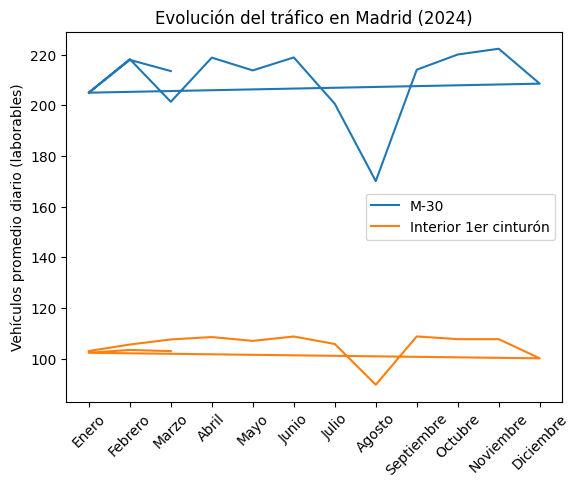

In [57]:
import matplotlib.pyplot as plt

plt.plot(df["Mes"], df["M-30"], label="M-30")
plt.plot(df["Mes"], df["Interior_1er__cinturón"], label="Interior 1er cinturón")
plt.xticks(rotation=45)
plt.legend()
plt.title("Evolución del tráfico en Madrid (2024)")
plt.ylabel("Vehículos promedio diario (laborables)")
plt.show()

In [58]:
print(df.columns)


Index(['Año', 'Mes', 'Interior_1er__cinturón', 'En_el_1er__cinturón',
       'Entre_1er_y_2º_cinturón', 'En_el_2er__cinturón',
       'Entre__2º_cinturón_y_M-30', 'M-30', 'Entre_M-30_y_M-40', 'M-40',
       'Exterior_a_M-40'],
      dtype='object')


In [59]:
df_long = df.melt(
    id_vars=["Año", "Mes"],  # columnas que NO se derriten
    var_name="Zona",
    value_name="Trafico"
)

print(df_long.head())


    Año      Mes                    Zona  Trafico
0  2024    Enero  Interior_1er__cinturón  103.019
1  2024  Febrero  Interior_1er__cinturón  105.578
2  2024    Marzo  Interior_1er__cinturón  107.578
3  2024    Abril  Interior_1er__cinturón  108.532
4  2024     Mayo  Interior_1er__cinturón  107.020


In [60]:
df_2024 = df_long[df_long["Año"] == 2024].copy()
df_2025 = df_long[df_long["Año"] == 2025].dropna() #el 2025 esta casi todo vacio


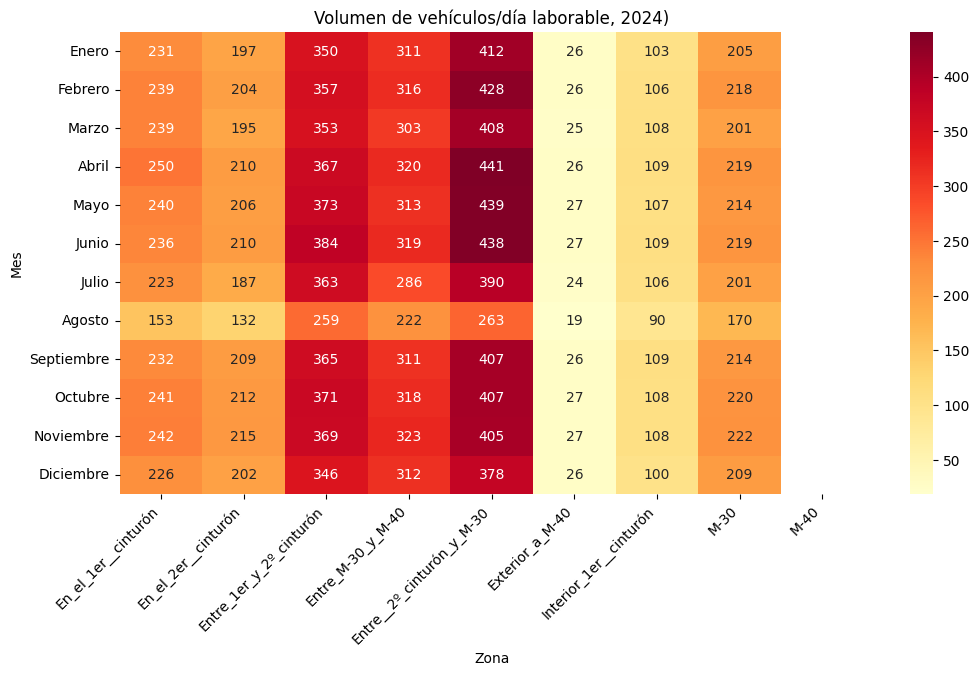

In [61]:
#para ver el volumen de vehiculos
# 1. Filtrar solo 2024
df_2024 = df_long[df_long["Año"] == 2024].copy()

# 2. Ordenar los meses en orden calendario
meses_orden = ["Enero","Febrero","Marzo","Abril","Mayo","Junio",
               "Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

df_2024["Mes"] = pd.Categorical(df_2024["Mes"], categories=meses_orden, ordered=True)

# 3. Crear tabla para heatmap (Mes vs Zona)
heatmap_data = df_2024.pivot(index="Mes", columns="Zona", values="Trafico")

# 4. Graficar heatmap
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Volumen de vehículos/día laborable, 2024)")
plt.ylabel("Mes")
plt.xlabel("Zona")
plt.xticks(rotation=45, ha="right")
plt.show()


/tmp/ipython-input-2822487554.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_norm["Trafico_pct"] = df_norm.groupby("Mes")["Trafico"].transform(lambda x: x / x.sum() * 100)


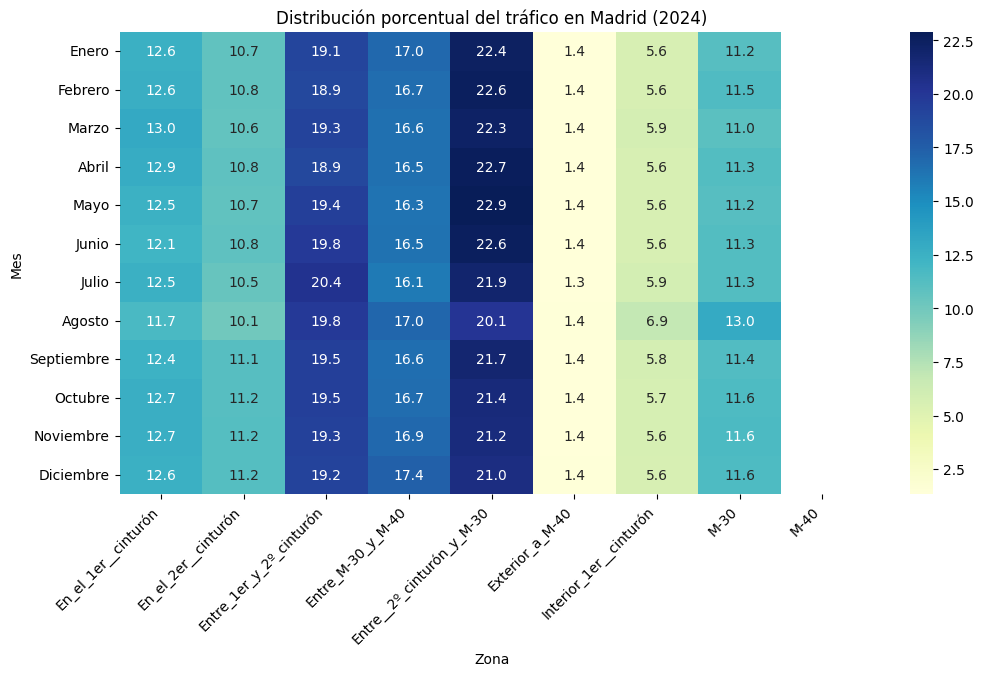

In [62]:
#codigo de heatmap normalizado por mes como porcentaje
#para analizar qué proporción del tráfico mensual ocurre en cada zona.

# 1. Copiar df_2024 para normalizar
df_norm = df_2024.copy()

# 2. Calcular % dentro de cada mes
df_norm["Trafico_pct"] = df_norm.groupby("Mes")["Trafico"].transform(lambda x: x / x.sum() * 100)

# 3. Pivotear para el heatmap
heatmap_pct = df_norm.pivot(index="Mes", columns="Zona", values="Trafico_pct")

# 4. Graficar
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_pct, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Distribución porcentual del tráfico en Madrid (2024)")
plt.ylabel("Mes")
plt.xlabel("Zona")
plt.xticks(rotation=45, ha="right")
plt.show()


In [63]:
print(df_norm["Zona"].unique())


['Interior_1er__cinturón' 'En_el_1er__cinturón' 'Entre_1er_y_2º_cinturón'
 'En_el_2er__cinturón' 'Entre__2º_cinturón_y_M-30' 'M-30'
 'Entre_M-30_y_M-40' 'M-40' 'Exterior_a_M-40']


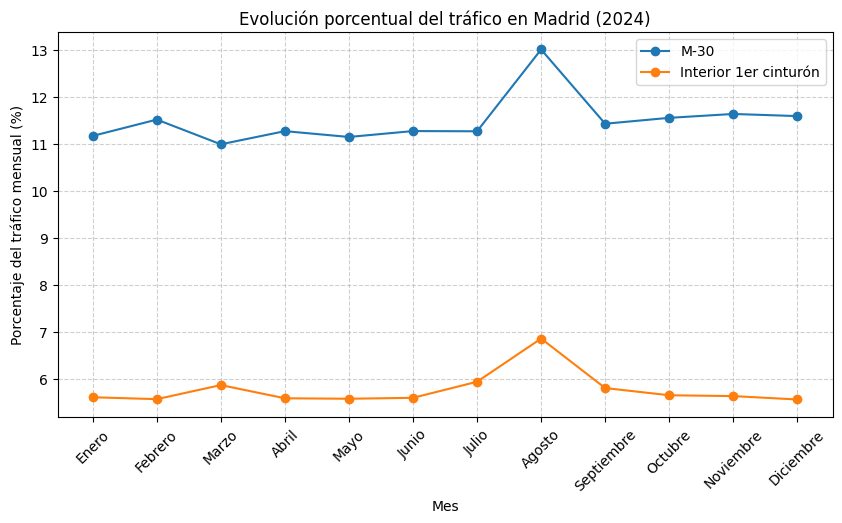

In [64]:
#comparar la evolución del porcentaje de tráfico en la M-30 frente al Interior del
#1er cinturón a lo largo de los meses de 2024.

# 1. Filtrar solo las zonas de interés
df_comp = df_norm[df_norm["Zona"].isin(["M-30", "Interior_1er__cinturón"])]

# 2. Pivotear para tener columnas separadas
df_comp = df_comp.pivot(index="Mes", columns="Zona", values="Trafico_pct")

# 3. Graficar líneas
plt.figure(figsize=(10,5))
plt.plot(df_comp.index, df_comp["M-30"], marker="o", label="M-30")
plt.plot(df_comp.index, df_comp["Interior_1er__cinturón"], marker="o", label="Interior 1er cinturón")

plt.title("Evolución porcentual del tráfico en Madrid (2024)")
plt.ylabel("Porcentaje del tráfico mensual (%)")
plt.xlabel("Mes")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [65]:
# Filtrar df_2024 solo M-30
df_m30 = df_2024[df_2024["Zona"]=="M-30"].copy()

# Meses como X
X = np.arange(1, len(df_m30)+1).reshape(-1,1)  # 1,2,...12

# Tráfico como y
y = df_m30["Trafico"].values  # ahora tiene 12 valores

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Predecir mes 13
y_pred = model.predict([[13]])
print(f"Predicción M-30 mes 13: {y_pred[0]:.0f} vehículos/día")


Predicción M-30 mes 13: 210 vehículos/día


Zona M-40 no tiene datos y será ignorada.


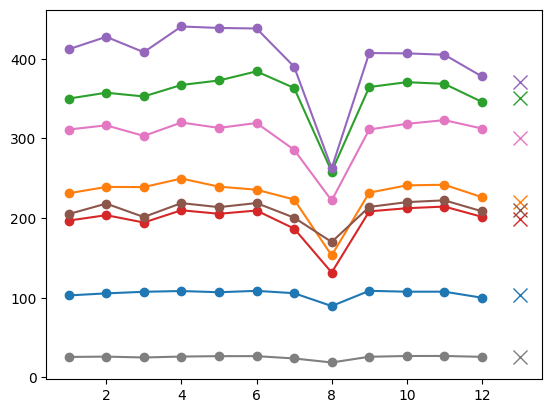

In [71]:
#predecir mes 13 para todas las zonas

for zona in zonas:
    df_zona = df_2024[df_2024["Zona"]==zona].copy()

    # Eliminar NaN
    df_zona = df_zona.dropna(subset=["Trafico"])

    # Saltar si no hay datos
    if df_zona.empty:
        print(f"Zona {zona} no tiene datos y será ignorada.")
        continue

    # Meses 1-12 como X
    X = np.arange(1, len(df_zona)+1).reshape(-1,1)
    y = df_zona["Trafico"].values

    # Entrenar modelo lineal
    model = LinearRegression()
    model.fit(X, y)

    # Predecir mes 13
    y_pred = model.predict([[13]])
    predicciones_mes13[zona] = y_pred[0]

    # Graficar línea histórica y punto predicción
    plt.plot(X, y, marker="o", label=f"{zona} (histórico)")
    plt.plot(13, y_pred, marker="x", markersize=10, color=plt.gca().lines[-1].get_color())


In [ ]:
#los marcados picos de caida en agosto se deben al periodo vacacional